구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


작업 폴더 경로 설정

In [2]:
import os
workspace_path = '/gdrive/My Drive/Colab_Notebooks/DA_TermProject'  # 과제 파일 업로드한 경로 반영
data_path = os.path.join(workspace_path, 'data')  # 데이터 파일 경로 반영

패키지 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 심리 성향 예측하기

*   목표: 마키아벨리즘 심리테스트 이용 참가자의 국가 선거 투표 여부 예측

### 데이터 불러오기

In [4]:
train = pd.read_csv(os.path.join(data_path, 'train.csv'), index_col=0)
train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1


In [5]:
test = pd.read_csv(os.path.join(data_path, 'test_x.csv'), index_col=0)
test.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,...,0,1,0,0,1,0,1,0,1,1
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,...,0,0,0,0,0,0,0,0,0,0
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,...,0,1,0,1,1,0,1,0,1,1
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,...,1,1,1,1,1,1,1,1,1,1
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,...,1,1,0,1,1,0,1,1,1,1


In [6]:
submission = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'), index_col=0)
submission.head()

,voted
index,
0,0
1,0
2,0
3,0
4,0


타깃 테이터 확인

In [7]:
train.voted.value_counts() #  'voted'의 속성값 빈도수 확인

2    24898
1    20634
Name: voted, dtype: int64

기본 정보 확인

In [8]:
train.info()

# object값인 'age_group', 'gender', 'race', 'religion'를 정제해야 함
# 각 특성에 null값이 존재하지 않는 것을 확인 가능

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11383 entries, 0 to 11382
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         11383 non-null  float64
 1   QaE         11383 non-null  int64  
 2   QbA         11383 non-null  float64
 3   QbE         11383 non-null  int64  
 4   QcA         11383 non-null  float64
 5   QcE         11383 non-null  int64  
 6   QdA         11383 non-null  float64
 7   QdE         11383 non-null  int64  
 8   QeA         11383 non-null  float64
 9   QeE         11383 non-null  int64  
 10  QfA         11383 non-null  float64
 11  QfE         11383 non-null  int64  
 12  QgA         11383 non-null  float64
 13  QgE         11383 non-null  int64  
 14  QhA         11383 non-null  float64
 15  QhE         11383 non-null  int64  
 16  QiA         11383 non-null  float64
 17  QiE         11383 non-null  int64  
 18  QjA         11383 non-null  float64
 19  QjE         11383 non-nul

비어있는 값 확인

In [10]:
# 데이터프레임의 모든 null 값의 총 개수 출력
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


###데이터 분석

QXA 데이터 상관관계 분석

1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.

<Axes: >

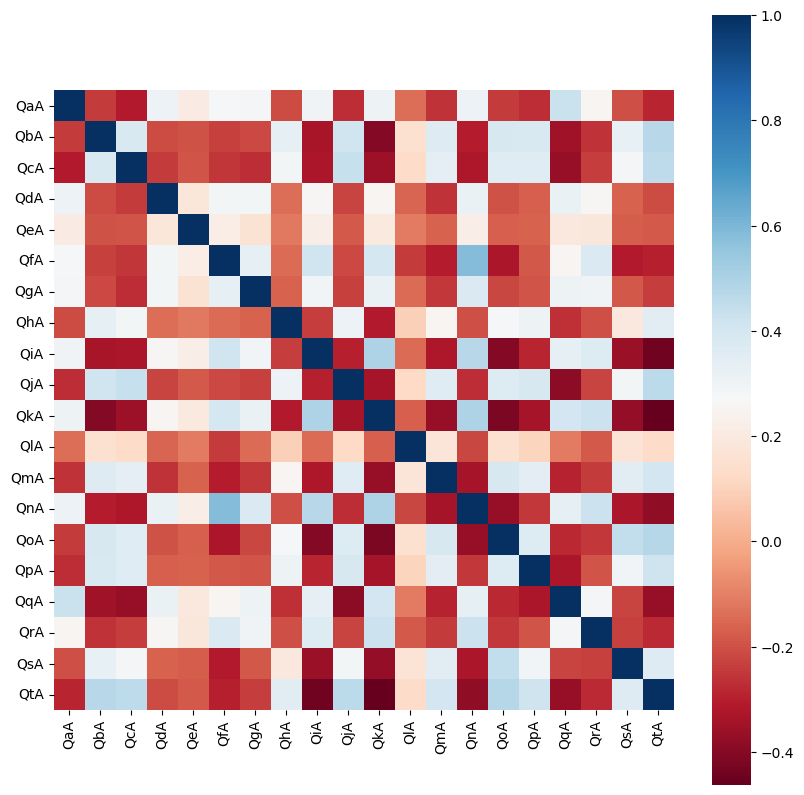

In [11]:
Q_A = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA',
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

corr = train[Q_A].corr(method = 'pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cmap=colormap) # 부호가 같은 문항끼린 양의 상관관계를 가지며 부호가 다른 문항끼린 음의 상관관계를 가짐

음의 부호를 가지는 문항 처리

In [12]:
# reverse - 음의 상관관계를 가지는 변수를 6에서 뺌(문항의 답변 값이 1~5이므로 이를 6에서 빼어 양의 상관관계로 바꾸는 작업)
columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for change in columns:
    train[change] = 6 - train[change]
    test[change] = 6 - test[change]

<Axes: >

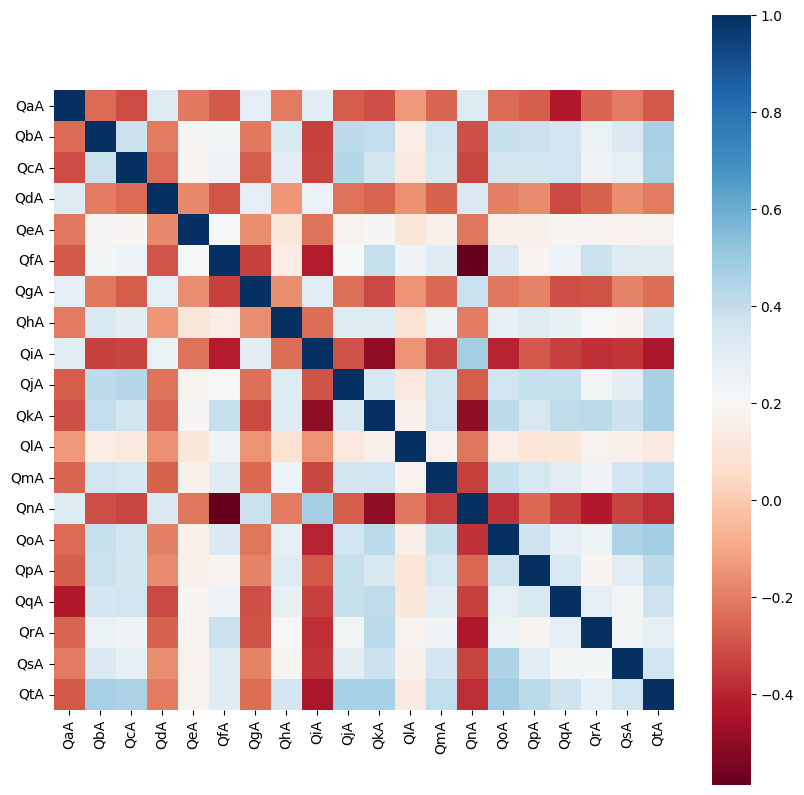

In [13]:
corr = train[Q_A].corr(method = 'pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cmap=colormap) # 부호가 같은 문항끼린 양의 상관관계를 가지며 부호가 다른 문항끼린 음의 상관관계를 가짐

이전 히트맵에서 음의 부호를 갖는 5개 문항이 Secret의 음의 부호를 갖는 5개 문항

ㄴ> 동일한 방법으로 처리

<Axes: >

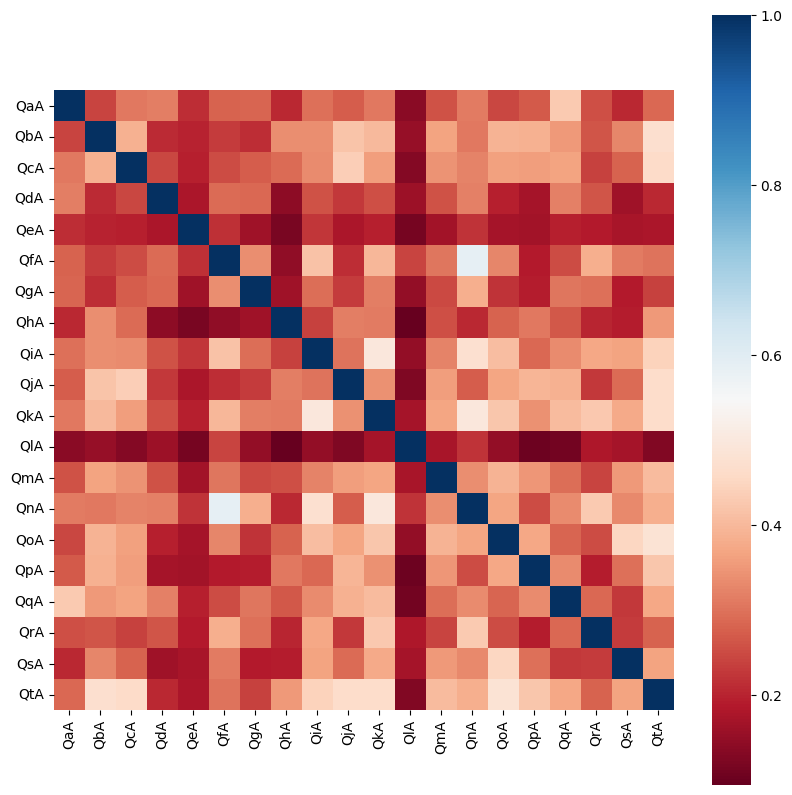

In [14]:
# 음의 상관관계를 가지는 변수를 6에서 뺌
columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for change in columns:
    train[change] = 6 - train[change]
    test[change] = 6 - test[change]

corr = train[Q_A].corr(method = 'pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cmap=colormap) # 부호가 같은 문항끼린 양의 상관관계를 가지며 부호가 다른 문항끼린 음의 상관관계를 가짐

이전 방법을 기반으로 마키아벨리즘 테스트 전체 점수 데이터를

'MV_score'라는 컬럼으로 추가

In [15]:
train['MV_score'] = train[Q_A].mean(axis=1)
test['MV_score'] = test[Q_A].mean(axis=1)
train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,MV_score
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,...,1,0,1,1,0,1,0,1,1,2.95
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,...,1,0,1,1,0,1,0,1,1,2.60
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,...,1,0,1,1,1,1,0,1,1,1.90
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,...,0,0,0,1,0,1,0,1,1,3.35
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,...,1,1,1,1,0,1,1,1,1,3.00


설문자 개인정보 특성이 투표율에 미치는 영향 확인

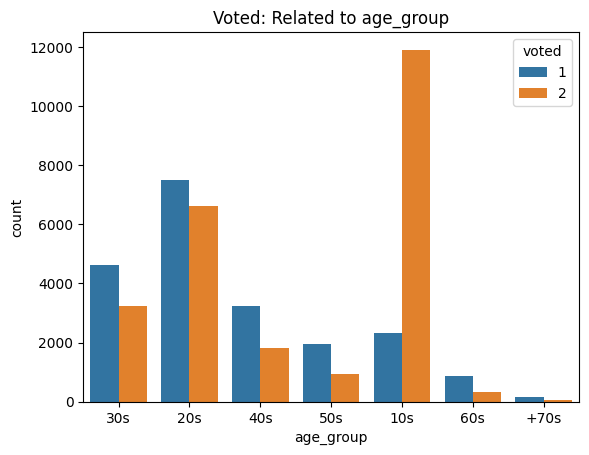

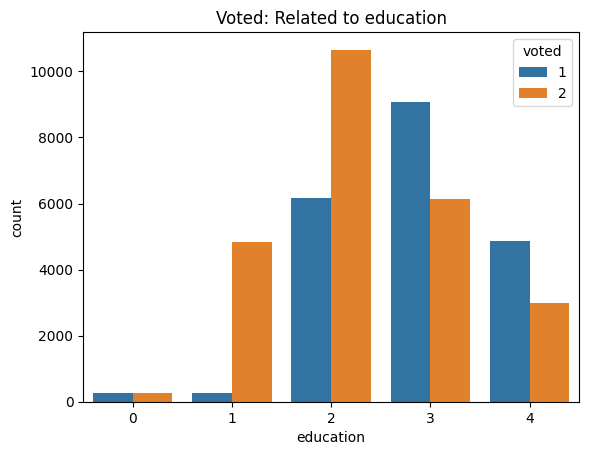

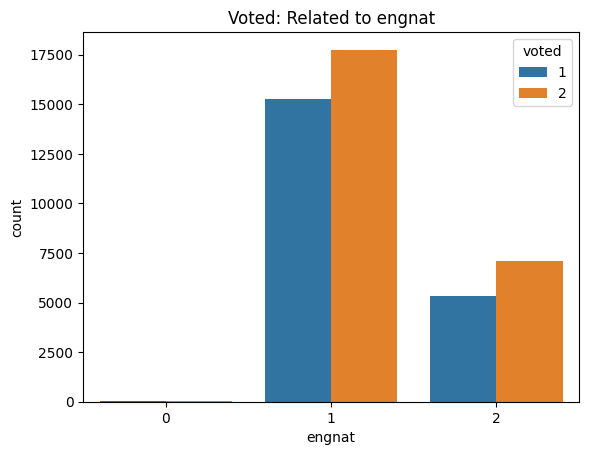

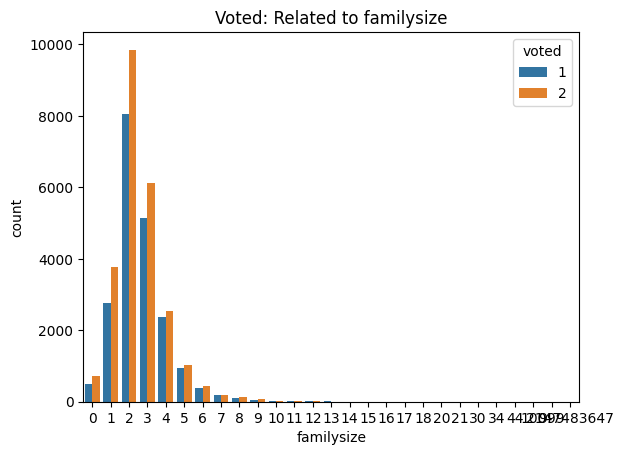

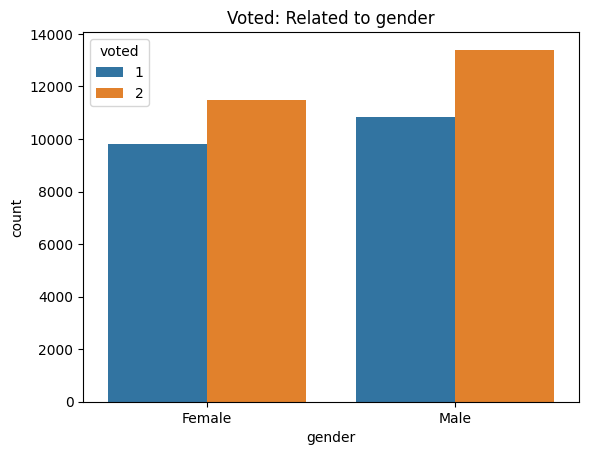

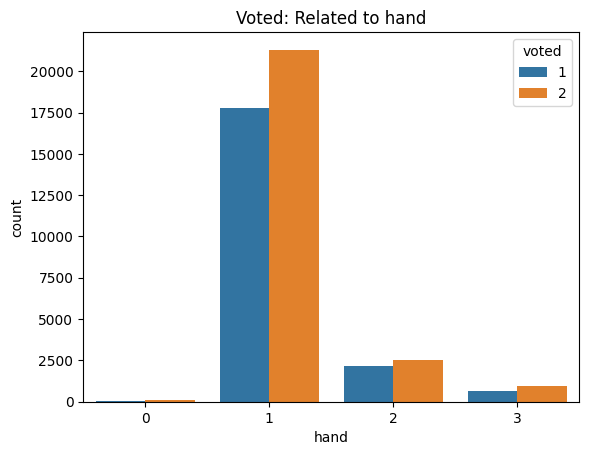

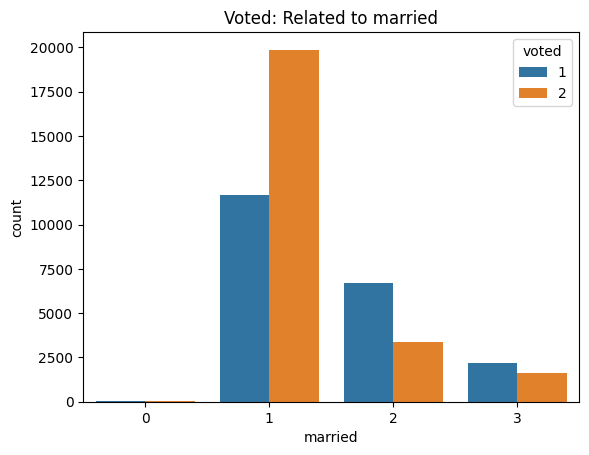

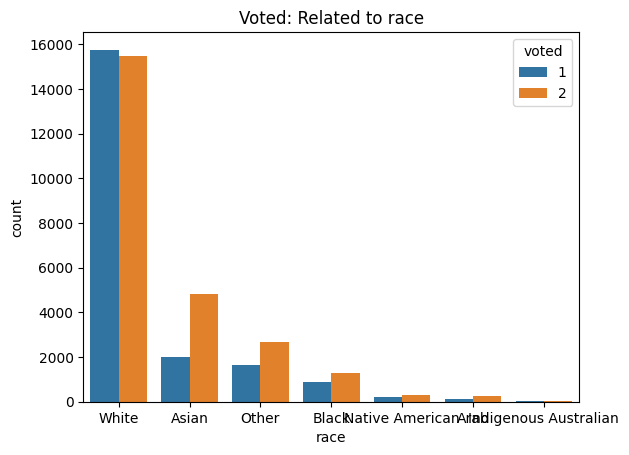

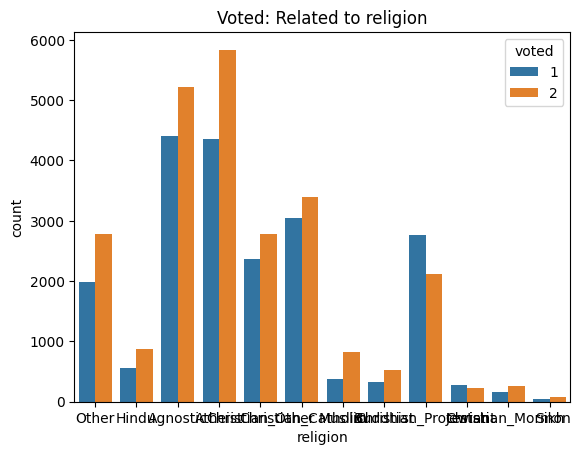

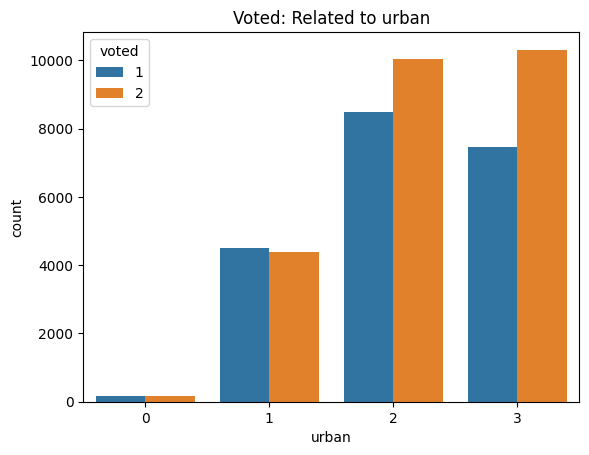

In [16]:
features = ['age_group', 'education', 'engnat', 'familysize', 'gender', 'hand', 'married', 'race', 'religion', 'urban']

for i in features:
  sns.countplot(x = i, hue='voted', data=train)  # 빈도수 막대그래프
  plt.title(f"Voted: Related to {i}")
  plt.show()
  print('\n')

tpXX 데이터 상관관계 분석

1 = Disagree strongly, 2 = Disagree moderately, 3 = Disagree a little

4 = Neither agree nor disagree, 5 = Agree a little, 6 = Agree moderately, 7 = Agree strongly

<Axes: >

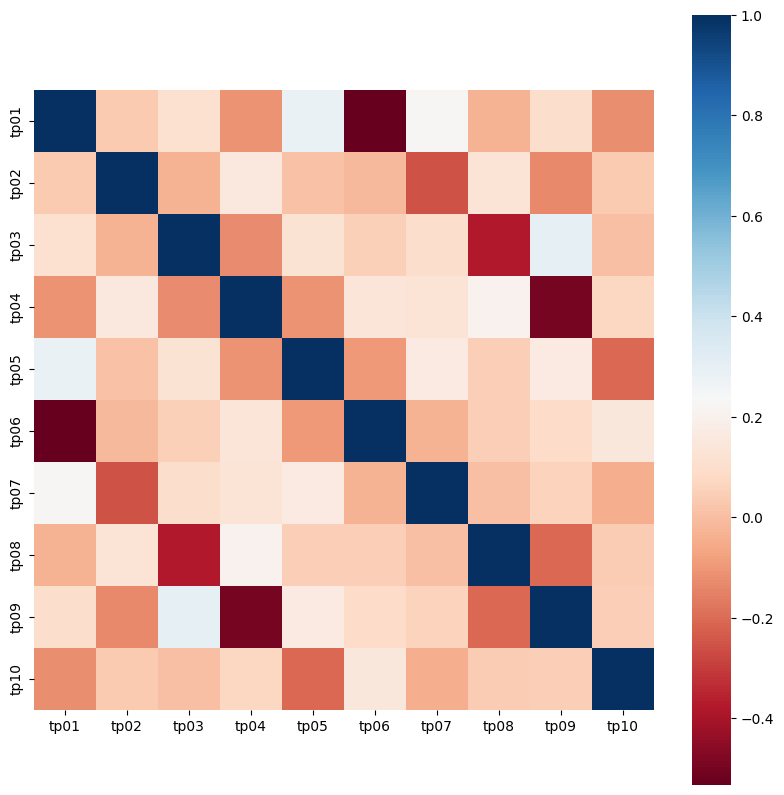

In [17]:
tp = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05',
             'tp06', 'tp07', 'tp08', 'tp09', 'tp10']

corr = train[tp].corr(method = 'pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cmap=colormap) # 부호가 같은 문항끼린 양의 상관관계를 가지며 부호가 다른 문항끼린 음의 상관관계를 가짐

음의 부호를 가지는 문항 처리

In [18]:
# reverse - 음의 상관관계를 가지는 변수를 8에서 뺌
columns = ["tp02", "tp04", "tp06", "tp08", "tp10"]
for change in columns:
    train[change] = 8 - train[change]
    test[change] = 8 - test[change]

<Axes: >

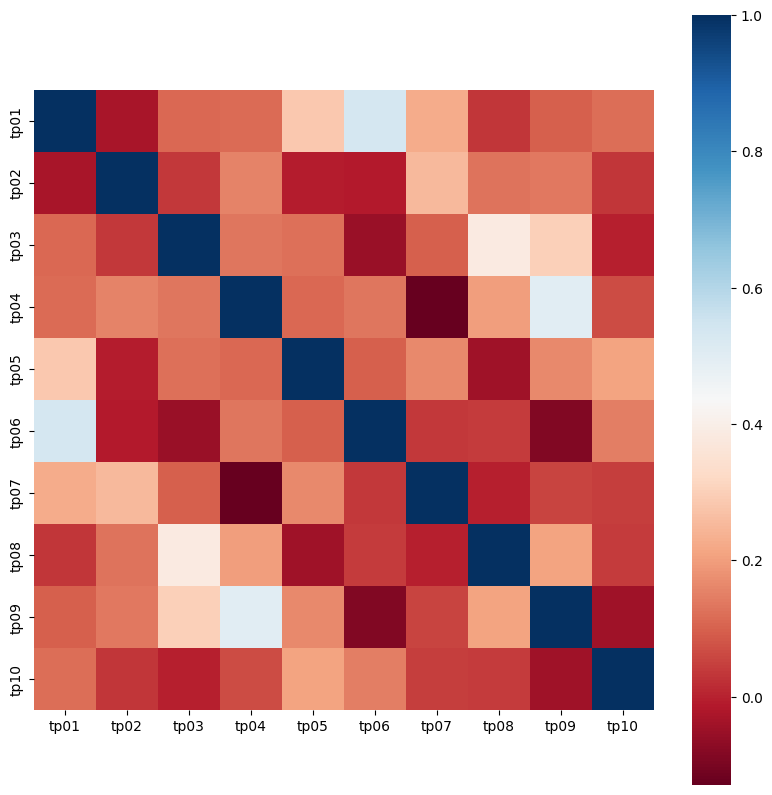

In [19]:
corr = train[tp].corr(method = 'pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cmap=colormap) # 부호가 같은 문항끼린 양의 상관관계를 가지며 부호가 다른 문항끼린 음의 상관관계를 가짐

서로 관련된 성격 설문 답변 내용을 합친 데이터를

각 성격에 해당하는 단어로 합친 컬럼을 추가

In [20]:
# train 데이터에 성격 데이터 추가
train['Extraversion'] = train['tp01'] + train['tp06'] # 외향성
train['Agreeableness'] = train['tp02'] + train['tp07'] # 친화성
train['Conscientiousness'] = train['tp03'] + train['tp08'] # 성실성
train['Emotional Stability'] = train['tp04'] + train['tp09'] # 정서적 안정성
train['Openness to Experiences'] = train['tp05'] + train['tp10'] # 경험에 대한 개방성

# test 데이터에 성격 데이터 추가
test['Extraversion'] = test['tp01'] + test['tp06']
test['Agreeableness'] = test['tp02'] + test['tp07']
test['Conscientiousness'] = test['tp03'] + test['tp08']
test['Emotional Stability'] = test['tp04'] + test['tp09']
test['Openness to Experiences'] = test['tp05'] + test['tp10']

wr, wf 각 특성의 합(횟수)을 수행한 컬럼 추가

+ wr_XX : 실존하는 단어의 정의를 앎 1 = YES, 0 = NO
+ wf_XX : 허구인 단어의 정의를 앎 1 = YES, 0 = NO

In [21]:
# wr_XX 답변 값 0,1의 총 횟수
wr_sum = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11','wr_12', 'wr_13']
train['wr_sum'] = train[wr_sum].sum(axis=1)
test['wr_sum'] = test[wr_sum].sum(axis=1)

# wf_XX 답변 값 0,1의 총 횟수
wf_sum = ['wf_01', 'wf_02', 'wf_03']
train['wf_sum'] = train[wf_sum].sum(axis=1)
test['wf_sum'] = test[wf_sum].sum(axis=1)

###데이터 정제

>object값인 'age_group', 'gender', 'race', 'religion'를 정수형 데이터로 변환

age_group 정제

In [22]:
def category_age(x):
  result = 0

  if x == '10s':
    result = 1
  elif x == '20s':
    result = 2
  elif x == '30s':
    result = 3
  elif x == '40s':
    result = 4
  elif x == '50s':
    result = 5
  elif x == '60s':
    result = 6
  else:
    result = 7
  return result

In [23]:
train['age_group'] = train['age_group'].apply(category_age)

test['age_group'] = test['age_group'].apply(category_age)

print(train['age_group'].unique())
print(test['age_group'].unique())

[3 2 4 5 1 6 7]
[1 3 6 2 5 4 7]


gender 정제

In [24]:
train['gender'] = train['gender'].map({'Male': 1, 'Female': 0})
test['gender'] = test['gender'].map({'Male': 1, 'Female': 0})

print(train['gender'].unique())
print(test['gender'].unique())

[0 1]
[1 0]


race 정제

In [25]:
# mean 인코딩
target = 'voted'

race_mean = train.groupby('race')[target].mean()

train['race'] = train['race'].map(race_mean)
test['race'] = test['race'].map(race_mean)

print(train['race'].unique())
print(test['race'].unique())

[1.49577573 1.70456541 1.62240185 1.59778598 1.58759124 1.70940171
 1.54716981]
[1.49577573 1.62240185 1.70456541 1.58759124 1.70940171 1.59778598
 1.54716981]


religion 정제


In [26]:
# mean 인코딩
target = 'voted'

religion_mean = train.groupby('religion')[target].mean()

train['religion'] = train['religion'].map(religion_mean)
test['religion'] = test['religion'].map(religion_mean)

print(train['religion'].unique())
print(test['religion'].unique())

[1.58280922 1.6130161  1.54260183 1.57270408 1.53961456 1.52651221
 1.68708054 1.62117647 1.43466667 1.44969199 1.61915888 1.64102564]
[1.43466667 1.52651221 1.53961456 1.54260183 1.62117647 1.6130161
 1.58280922 1.57270408 1.64102564 1.68708054 1.61915888 1.44969199]


>결측값 존재하는 데이터 확인

In [27]:
print(train.education.value_counts(),'\n') # 'education'의 속성값 빈도수 확인
print(train.engnat.value_counts(),'\n')
print(train.hand.value_counts(),'\n')
print(train.married.value_counts(),'\n')
print(train.urban.value_counts(),'\n')
print(train.familysize.value_counts())

2    16835
3    15227
4     7854
1     5088
0      528
Name: education, dtype: int64 

1    33024
2    12431
0       77
Name: engnat, dtype: int64 

1    39058
2     4692
3     1621
0      161
Name: hand, dtype: int64 

1    31550
2    10059
3     3830
0       93
Name: married, dtype: int64 

2    18534
3    17767
1     8909
0      322
Name: urban, dtype: int64 

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
44                3
17                3
21                2
20                2
16                2
999               1
2147483647        1
100               1
34                1
30                1
18                1
Name: familysize, dtype: int64


>각 데이터의 결측값 처리

education의 결측값 처리

In [28]:
# education 정제
train['education'] = train['education'].replace(0,2)
test['education'] = test['education'].replace(0,2)

engnat, hand, married의 결측값 처리

In [29]:
# engnat 정제
train['engnat'] = train['engnat'].replace(0, train['engnat'].mode()[0])
test['engnat'] = test['engnat'].replace(0, test['engnat'].mode()[0])

# hand 정제
train['hand'] = train['hand'].replace(0, train['hand'].mode()[0])
test['hand'] = test['hand'].replace(0, test['hand'].mode()[0])

# married 정제
train['married'] = train['married'].replace(0, train['married'].mode()[0])
test['married'] = test['married'].replace(0, test['married'].mode()[0])

urban의 결측값 처리

In [30]:
# urban 정제
train['urban'] = train['urban'].replace(0,2)
test['urban'] = test['urban'].replace(0,2)

familysize의 결측값 처리

In [31]:
# familysize 정제 - (임의) 30명 이상의 데이터 값 제거
train = train.drop(train[train['familysize'] > 30].index)
test =  test.drop(test[test['familysize'] > 30].index)

>결측값 존재했던 데이터 확인

In [32]:
print(train.education.value_counts(),'\n')
print(train.engnat.value_counts(),'\n')
print(train.hand.value_counts(),'\n')
print(train.married.value_counts(),'\n')
print(train.urban.value_counts(),'\n')
print(train.familysize.value_counts())

2    17357
3    15226
4     7854
1     5088
Name: education, dtype: int64 

1    33094
2    12431
Name: engnat, dtype: int64 

1    39214
2     4691
3     1620
Name: hand, dtype: int64 

1    31639
2    10057
3     3829
Name: married, dtype: int64 

2    18855
3    17765
1     8905
Name: urban, dtype: int64 

2     17918
3     11256
1      6535
4      4907
5      1962
0      1217
6       838
7       387
8       221
9       126
10       59
11       39
12       21
13       11
14        9
15        8
17        3
21        2
20        2
16        2
30        1
18        1
Name: familysize, dtype: int64


최종 train, test 크기 확인

In [37]:
print(train.shape)
print(test.shape)

(45525, 85)
(11383, 84)


In [33]:
train_data = train.drop('voted', axis=1)
train_target = train['voted']

훈련 전 데이터 스케일링

In [34]:
# scaler 사용 전 앞서 이상치 제거: 이상치가 평균과 표준편차에 영향을 미쳐 데이터의 분포가 달라질 수 있기 때문에
# 모델 훈련 전 scaler로 스케일링
# feature들을 정규분포로 만들기 - StandardScaler를 사용하여 각 feature의 평균은 0, 분산은 1로 스케일링

scaler = StandardScaler()

scaler.fit(train_data) # 스케일링하기 위한 평균과 표준 편차를 계산
train_data = scaler.transform(train_data) # 스케일링 된 값 저장

test = scaler.transform(test) # 훈련 데이터에 적용한 scaler를 이용해 test 데이터도 스케일링 # 테스트 데이터도 fit을 적용하면 새로운 평균값과 분산값을 얻게되어 모델 성능을 정확히 평가할 수 없기 때문에

print(train_data.shape)
print(test.shape)

(45525, 84)
(11383, 84)


### 모델링

모델 선택 및 훈련

In [ ]:
model = HistGradientBoostingRegressor() # 정형 데이터를 다루는 머신러닝 알고리즘 중 가장 인기 있는 모델
model.fit(train_data, train_target)

HistGradientBoostingRegressor()

모델 성능 예측

In [ ]:
pred = model.predict(test)

예측 결과 확인

In [ ]:
pred

array([1.66648509, 1.86180573, 1.42511828, ..., 1.17162818, 1.35936735,
       1.64822467])

최종 제출 결과 넣기

In [ ]:
submission['voted']=pred

최종 제출 결과 확인

In [ ]:
submission.head()

,voted
index,
0,1.666485
1,1.861806
2,1.425118
3,1.194972
4,1.768517


최종 제출 파일 생성

In [ ]:
submission.to_csv(os.path.join(data_path, 'result9-6_submission.csv'))